In [44]:
import spacy

In [57]:
nlp = spacy.load("en_core_web_lg", exclude=["ner"])

In [60]:
s = 'Despite it being the "Big Apple", you can\'t find a good apple in NYC. I like them best from Martha\'s Vineyard.'

d = nlp(s)

result = [[token.lemma_.lower() for token in sentence if not token.is_stop and token.pos_ != 'PUNCT'] for sentence in d.sents]
#[[f'{token.lemma_}_{token.pos_}' for token in sentence] for sentence in d.sents]

In [61]:
for sent in result:
    print('[', end='')
    for token in sent:
        print('', token, '|', end='')
    print(']')

[ despite | big | apple | find | good | apple | nyc |]
[ like | well | martha | vineyard |]


In [ ]:
#nlp.Defaults.stop_words

### NMF

In [1]:
documents = ['apple apple', 'peach peach', 'apple peach']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                                   min_df=2,
                                   max_df=0.95,
                                   sublinear_tf=False)

X = tfidf_vectorizer.fit_transform(documents) 

In [5]:
X.toarray()

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.70710678, 0.70710678]])

In [23]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)

W = nmf.fit_transform(X.toarray().T)
H = nmf.components_

/Users/asajina/repos/master-thesis/.env/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [24]:
W

array([[1.05608892e-05, 1.08910877e+00],
       [9.78610949e-01, 0.00000000e+00]])

In [25]:
H

array([[0.        , 1.02185654, 0.72256169],
       [0.91818194, 0.        , 0.64924567]])

### word embeddings

In [1]:
import gensim.downloader as api
import time

t = time.time()

model_wiki = api.load('glove-wiki-gigaword-200')
#model_twitter = api.load("glove-twitter-200")

print(f'Time taken: {round((time.time() - t) / 60, 2)} mins')

/Users/asajina/repos/master-thesis/.env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Time taken: 0.78 mins


In [2]:
#model_wiki.most_similar('embedding')

In [3]:
#model_twitter.most_similar('embedding')

In [25]:
model_wiki.__contains__('tram')

True

In [56]:
import numpy as np

words = [
    'apple',
    'banana',
    'strawberry',
    'blueberry',
    'peach',
    'apricot',
#    'car',
#    'bicycle',
#    'bus',
#    'metro',
#    'tram',
#    'train',
    'asimov',
    'dostoevsky',
    'lermontov',
    'nabokov',
    'kafka',
    'kundera'
]

vectors = np.array([model_wiki[word] for word in words])

In [57]:
vectors.shape

(12, 200)

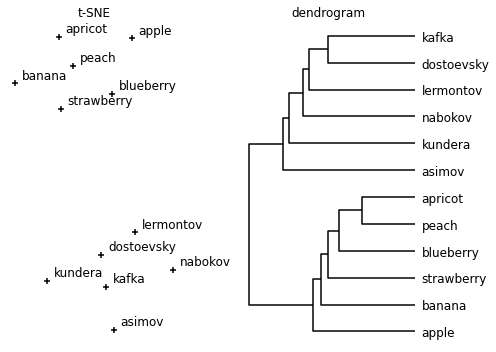

In [90]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(vectors)

# dendrogram
Z = hierarchy.linkage(vectors, method='average', metric='cosine')

# plot
fig, axes = plt.subplots(1, 2, figsize=(7,5))

# t-SNE
axes[0].scatter(tsne_result[:,0], tsne_result[:,1], color='black', marker='+')
for i,(x,y) in enumerate(tsne_result):
    axes[0].text(x+5, y+5, words[i], fontsize=12)
    
axes[0].axis('off')
axes[0].set_title('t-SNE')

# dendrogram
dn = hierarchy.dendrogram(Z, 
                          orientation='left', 
                          labels=words,
                          ax=axes[1],
                          link_color_func=lambda k: 'black'
                         )

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].set_title('dendrogram')

fig.tight_layout()

fig.savefig('../figures/visualization-example.png')

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(vectors)

In [69]:
tsne_result.shape

(12, 2)

(-195.34778442382813,
 140.24466552734376,
 -18.429882955551147,
 69.4114589214325)

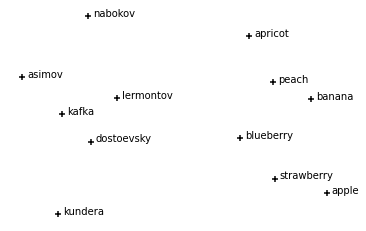

In [78]:
fig, ax = plt.subplots()

ax.scatter(tsne_result[:,0], tsne_result[:,1], color='black', marker='+')
for i,(x,y) in enumerate(tsne_result):
    ax.text(x+5, y, words[i])
    
ax.axis('off')

### temp

In [27]:
import pandas as pd

df = pd.read_csv('../data/euroleaks/parsed.csv')

In [28]:
df.head()

,speaker,speech,timestamp,date
0,Jeroen Dijsselbloem,… of your responses or questions. And can I fi...,1900-01-01 00:00:00,2015-02-24 00:00:00
1,Speaker 2,"Uh, yes, uh, thank you, Jeroen. Well, uh, comm...",1900-01-01 00:00:10,2015-02-24 00:00:00
2,Michael Noonan,Michael Noonan.,1900-01-01 00:01:27,2015-02-24 00:00:00
3,Speaker 2,"Uh, it is therefore regrettable that, uh-",1900-01-01 00:01:29,2015-02-24 00:00:00
4,Speaker 3,Has entered the conference.,1900-01-01 00:01:33,2015-02-24 00:00:00
